## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the Iris dataset

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
list(iris.feature_names)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [5]:
iris_df = pd.DataFrame(data=iris['data'], columns= iris['feature_names'])

## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

# instantiate
scaler = StandardScaler()

# fit_transform
iris_scaled = scaler.fit_transform(iris_df)
iris_scaled = pd.DataFrame(data = iris_scaled, columns = iris['feature_names'])

In [7]:
iris_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## Finding Optimal EPS

In [8]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(iris_scaled)
distances, indices = nbrs.kneighbors(iris_scaled)

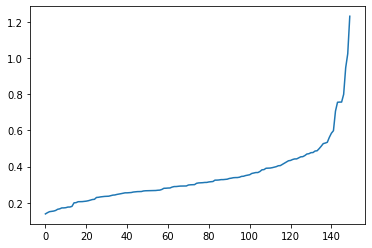

In [9]:
distances = np.average(distances, axis=1)
distances = np.sort(distances)

plt.plot(distances)

## Model Building

In [10]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps = 0.6,  min_samples = 5).fit(iris_scaled)
print(model)

DBSCAN(eps=0.6)


In [11]:
print(model.labels_)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1
  1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


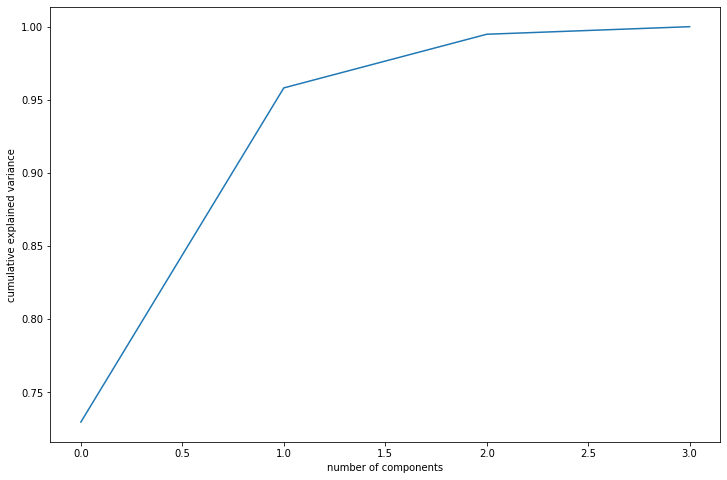

In [12]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

#let's apply PCA
pca.fit(iris_scaled)

#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## 2D PCA plot

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(iris_scaled))

In [14]:
pcs_iris_scaled = pd.DataFrame({'PC1':reduced[0],'PC2':reduced[1]})
pcs_iris_scaled.index = iris_scaled.index
pcs_iris_scaled.head()

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


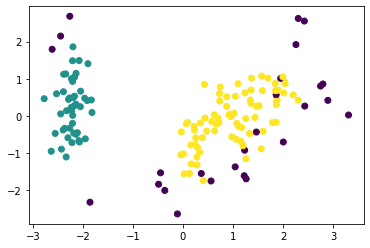

In [16]:
fig = plt.figure()
plt.scatter(pcs_iris_scaled['PC1'], pcs_iris_scaled['PC2'], c = model.labels_)
plt.show()

In [17]:
set(model.labels_)

{-1, 0, 1}

In [18]:
iris_scaled['cluster'] = model.labels_

In [19]:
iris_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


## Noise points

In [20]:
iris_scaled[iris_scaled['cluster'] == -1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
15,-0.173674,3.090775,-1.283389,-1.052180,-1
32,-0.779513,2.400185,-1.283389,-1.447076,-1
33,-0.416010,2.630382,-1.340227,-1.315444,-1
41,-1.627688,-1.743357,-1.397064,-1.183812,-1
57,-1.143017,-1.513160,-0.260315,-0.262387,-1
60,-1.021849,-2.433947,-0.146641,-0.262387,-1
62,0.189830,-1.973554,0.137547,-0.262387,-1
68,0.432165,-1.973554,0.421734,0.395774,-1
72,0.553333,-1.282963,0.649083,0.395774,-1
87,0.553333,-1.743357,0.364896,0.132510,-1


## Profiling

In [21]:
iris_scaled[~(iris_scaled['cluster'] == -1)].groupby('cluster').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
0,-1.037654,0.788808,-1.303159,-1.255351
1,0.418184,-0.332664,0.603176,0.616849
